## PART III

##### Alumna: Cielo Aholiva Higuera Gutiérrez

#### Data Manipulation with Pandas

In [7]:
import pandas as pd

### Chapter 13

In [10]:
import numpy as np

In [12]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [14]:
data.index

RangeIndex(start=0, stop=4, step=1)

In [16]:
 data[1]

0.5

In [18]:
data[1:3]

1    0.50
2    0.75
dtype: float64

#### Series as Generalized NumPy Array

In [21]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

In [23]:
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [25]:
data['b']

0.5

In [27]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])

In [29]:
data

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64

In [31]:
data[5]

0.5

#### Series as Specialized Dictionary

In [34]:
population_dict = {'California': 39538223, 'Texas': 29145505,
                   'Florida': 21538187, 'New York': 20201249,
                   'Pennsylvania': 13002700}

In [36]:
population = pd.Series(population_dict)
population

California      39538223
Texas           29145505
Florida         21538187
New York        20201249
Pennsylvania    13002700
dtype: int64

In [43]:
population['California']

39538223

In [40]:
population['California':'Florida']

California    39538223
Texas         29145505
Florida       21538187
dtype: int64

#### Constructing Series Objects

In [48]:
pd.Series([2, 4, 6])

0    2
1    4
2    6
dtype: int64

In [50]:
pd.Series(5, index=[100, 200, 300])

100    5
200    5
300    5
dtype: int64

In [52]:
pd.Series({2:'a', 1:'b', 3:'c'})

2    a
1    b
3    c
dtype: object

In [54]:
pd.Series({2:'a', 1:'b', 3:'c'}, index=[1, 2])

1    b
2    a
dtype: object

### The Pandas DataFrame Object

##### DataFrame as Generalized NumPy Array

In [61]:
area_dict = {'California': 423967, 'Texas': 695662, 'Florida': 170312,
            'New York': 141297, 'Pennsylvania': 119280}
area = pd.Series(area_dict)
area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
dtype: int64

In [63]:
states = pd.DataFrame({'population': population,'area': area})
states

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [65]:
states.index

Index(['California', 'Texas', 'Florida', 'New York', 'Pennsylvania'], dtype='object')

In [67]:
states.columns

Index(['population', 'area'], dtype='object')

#### DataFrame as Specialized Dictionary

In [70]:
states['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

#### Constructing DataFrame Objects

In [73]:
pd.DataFrame(population, columns=['population'])

,population
California,39538223
Texas,29145505
Florida,21538187
New York,20201249
Pennsylvania,13002700


In [75]:
 data = [{'a': i, 'b': 2 * i} 
         for i in range(3)]
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [77]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [83]:
# From a dictionary of Series objects
pd.DataFrame({'population': population,
               'area': area})

,population,area
California,39538223,423967
Texas,29145505,695662
Florida,21538187,170312
New York,20201249,141297
Pennsylvania,13002700,119280


In [85]:
# From a two-dimensional NumPy array
pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])

,foo,bar
a,0.447256,0.965433
b,0.403520,0.782064
c,0.394506,0.778067


In [87]:
# From a NumPy structured array
A = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
A

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [89]:
pd.DataFrame(A)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


#### The Pandas Index Object

In [92]:
ind = pd.Index([2, 3, 5, 7, 11])
ind

Index([2, 3, 5, 7, 11], dtype='int64')

In [94]:
# Index as Immutable Array
ind[1]

3

In [96]:
ind[::2]

Index([2, 5, 11], dtype='int64')

In [98]:
print(ind.size, ind.shape, ind.ndim, ind.dtype)

5 (5,) 1 int64


In [100]:
ind[1] = 0

TypeError: Index does not support mutable operations

In [102]:
# Index as Ordered Set
indA = pd.Index([1, 3, 5, 7, 9])
indB = pd.Index([2, 3, 5, 7, 11])

In [104]:
 indA.intersection(indB)

Index([3, 5, 7], dtype='int64')

In [106]:
indA.union(indB)

Index([1, 2, 3, 5, 7, 9, 11], dtype='int64')

In [108]:
indA.symmetric_difference(indB)

Index([1, 2, 9, 11], dtype='int64')

### Chapter 14

#### Data Indexing and Selection

In [116]:
# Data Selection in Series
# Series as Dictionary
import pandas as pd
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [118]:
data['b']

0.5

In [120]:
# We can also use dictionary-like Python expressions and methods to examine the keys/indices and values:
'a' in data

True

In [122]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [124]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [126]:
# Series objects can also be modified with a dictionary-like syntax. Just as you can
# extend a dictionary by assigning to a new key, you can extend a Series by assigning
# to a new index value:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series as One-Dimensional Array

In [129]:
# slicing by explicit index
data['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [131]:
# slicing by implicit integer index
data[0:2]

a    0.25
b    0.50
dtype: float64

In [133]:
# masking
data[(data > 0.3) & (data < 0.8)]

b    0.50
c    0.75
dtype: float64

In [135]:
# fancy indexing
data[['a', 'e']]

a    0.25
e    1.25
dtype: float64

#### Indexers: loc and iloc

In [138]:
data = pd.Series(['a', 'b', 'c'], index=[1, 3, 5])
data

1    a
3    b
5    c
dtype: object

In [140]:
# explicit index when indexing
data[1]

'a'

In [142]:
# implicit index when slicing
data[1:3]

3    b
5    c
dtype: object

In [146]:
# First, the loc attribute allows indexing and slicing that always references the explicit index:
data.loc[1]

'a'

In [148]:
data.loc[1:3]

1    a
3    b
dtype: object

In [150]:
# The iloc attribute allows indexing and slicing that always references the implicit Python-style index:
data.iloc[1]

'b'

In [152]:
data.iloc[1:3]

3    b
5    c
dtype: object

### Data Selection in DataFrames
#### DataFrame as Dictionary

In [156]:
area = pd.Series({'California': 423967, 'Texas': 695662,
                  'Florida': 170312, 'New York': 141297,
                  'Pennsylvania': 119280})
pop = pd.Series({'California': 39538223, 'Texas': 29145505,
                 'Florida': 21538187, 'New York': 20201249,
                 'Pennsylvania': 13002700})
data = pd.DataFrame({'area':area, 'pop':pop})
data

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187
New York,141297,20201249
Pennsylvania,119280,13002700


In [158]:
# The individual Series that make up the columns of the DataFrame can be accessed via dictionary-style indexing of the column name:
data['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [160]:
data.area

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [162]:
data.pop is data["pop"]

False

In [164]:
# Like with the Series objects discussed earlier, this dictionary-style syntax can also be
# used to modify the object, in this case adding a new column:
data['density'] = data['pop'] / data['area']
data

,area,pop,density
California,423967,39538223,93.257784
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120
Pennsylvania,119280,13002700,109.009893


#### DataFrame as Two-Dimensional Array

In [167]:
data.values

array([[4.23967000e+05, 3.95382230e+07, 9.32577842e+01],
       [6.95662000e+05, 2.91455050e+07, 4.18960717e+01],
       [1.70312000e+05, 2.15381870e+07, 1.26463121e+02],
       [1.41297000e+05, 2.02012490e+07, 1.42970120e+02],
       [1.19280000e+05, 1.30027000e+07, 1.09009893e+02]])

In [169]:
# With this picture in mind, many familiar array-like operations can be done on the
# DataFrame itself. For example, we can transpose the full DataFrame to swap rows and
# columns:
data.T

,California,Texas,Florida,New York,Pennsylvania
area,4.239670e+05,6.956620e+05,1.703120e+05,1.412970e+05,1.192800e+05
pop,3.953822e+07,2.914550e+07,2.153819e+07,2.020125e+07,1.300270e+07
density,9.325778e+01,4.189607e+01,1.264631e+02,1.429701e+02,1.090099e+02


In [171]:
data.values[0]

array([4.23967000e+05, 3.95382230e+07, 9.32577842e+01])

In [173]:
data['area']

California      423967
Texas           695662
Florida         170312
New York        141297
Pennsylvania    119280
Name: area, dtype: int64

In [175]:
data.iloc[:3, :2]

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


In [177]:
# Similarly, using the loc indexer we can index the underlying data in an array-like
# style but using the explicit index and column names:
data.loc[:'Florida', :'pop']

,area,pop
California,423967,39538223
Texas,695662,29145505
Florida,170312,21538187


In [179]:
data.loc[data.density > 120, ['pop', 'density']]

,pop,density
Florida,21538187,126.463121
New York,20201249,142.970120


In [181]:
data.iloc[0, 2] = 90
data

,area,pop,density
California,423967,39538223,90.000000
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120
Pennsylvania,119280,13002700,109.009893


#### Additional Indexing Conventions

In [184]:
data['Florida':'New York']

,area,pop,density
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120


In [186]:
data[1:3]

,area,pop,density
Texas,695662,29145505,41.896072
Florida,170312,21538187,126.463121


In [188]:
data[data.density > 120]

,area,pop,density
Florida,170312,21538187,126.463121
New York,141297,20201249,142.970120


### Chapter 16

### Handling Missing Data
##### Missing Data in Pandas

In [198]:
# None as a Sentinel Value
vals1 = np.array([1, None, 2, 3])
vals1

array([1, None, 2, 3], dtype=object)

In [200]:
%timeit np.arange(1E6, dtype=int).sum()

3.54 ms ± 191 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [202]:
%timeit np.arange(1E6, dtype=object).sum()

131 ms ± 6.25 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [204]:
vals1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

#### NaN: Missing Numerical Data

In [208]:
vals2 = np.array([1, np.nan, 3, 4])
vals2

array([ 1., nan,  3.,  4.])

In [210]:
1 + np.nan

nan

In [212]:
0 * np.nan

nan

In [214]:
vals2.sum(), vals2.min(), vals2.max()

(nan, nan, nan)

In [216]:
np.nansum(vals2), np.nanmin(vals2), np.nanmax(vals2)

(8.0, 1.0, 4.0)

#### NaN and None in Pandas

In [219]:
pd.Series([1, np.nan, 2, None])

0    1.0
1    NaN
2    2.0
3    NaN
dtype: float64

In [221]:
# For types that don’t have an available sentinel value, Pandas automatically typecasts
# when NA values are present. For example, if we set a value in an integer array to
# np.nan, it will automatically be upcast to a floating-point type to accommodate the
# NA:
x = pd.Series(range(2), dtype=int)
x

0    0
1    1
dtype: int32

In [223]:
x[0] = None
x

0    NaN
1    1.0
dtype: float64

#### Pandas Nullable Dtypes

In [226]:
pd.Series([1, np.nan, 2, None, pd.NA], dtype='Int32')

0       1
1    <NA>
2       2
3    <NA>
4    <NA>
dtype: Int32

#### Operating on Null Values
#### Detecting Null Values

In [229]:
data = pd.Series([1, np.nan, 'hello', None])

In [231]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [233]:
data[data.notnull()]

0        1
2    hello
dtype: object

#### Dropping Null Values

In [236]:
data.dropna()

0        1
2    hello
dtype: object

In [238]:
df = pd.DataFrame([[1, np.nan, 2],
                   [2, 3, 5],
                   [np.nan, 4, 6]])
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [240]:
df.dropna()

,0,1,2
1,2.0,3.0,5


In [242]:
df.dropna(axis='columns')

,2
0,2
1,5
2,6


In [244]:
df[3] = np.nan
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [246]:
df.dropna(axis='columns', how='all')

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [248]:
df.dropna(axis='rows', thresh=3)

,0,1,2,3
1,2.0,3.0,5,NaN


#### Filling Null Values

In [251]:
data = pd.Series([1, np.nan, 2, None, 3], index=list('abcde'),
                 dtype='Int32')
data

a       1
b    <NA>
c       2
d    <NA>
e       3
dtype: Int32

In [253]:
data.fillna(0)

a    1
b    0
c    2
d    0
e    3
dtype: Int32

In [255]:
# forward fill
data.fillna(method='ffill')

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\3988156040.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill')


a    1
b    1
c    2
d    2
e    3
dtype: Int32

In [257]:
# back fill
data.fillna(method='bfill')

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\3243020708.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill')


a    1
b    2
c    2
d    3
e    3
dtype: Int32

In [259]:
# In the case of a DataFrame, the options are similar, but we can also specify an axis
# along which the fills should take place:
df

,0,1,2,3
0,1.0,NaN,2,NaN
1,2.0,3.0,5,NaN
2,NaN,4.0,6,NaN


In [261]:
df.fillna(method='ffill', axis=1)

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\901808322.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', axis=1)


,0,1,2,3
0,1.0,1.0,2.0,2.0
1,2.0,3.0,5.0,5.0
2,NaN,4.0,6.0,6.0


#### Chapter 17

In [264]:
### The Bad Way
index = [('California', 2010), ('California', 2020),
          ('New York', 2010), ('New York', 2020),
          ('Texas', 2010), ('Texas', 2020)]
populations = [37253956, 39538223,
               19378102, 20201249,
               25145561, 29145505]
pop = pd.Series(populations, index=index)
pop

(California, 2010)    37253956
(California, 2020)    39538223
(New York, 2010)      19378102
(New York, 2020)      20201249
(Texas, 2010)         25145561
(Texas, 2020)         29145505
dtype: int64

In [266]:
# With this indexing scheme, you can straightforwardly index or slice the series based
# on this tuple index:
pop[('California', 2020):('Texas', 2010)]

(California, 2020)    39538223
(New York, 2010)      19378102
(New York, 2020)      20201249
(Texas, 2010)         25145561
dtype: int64

In [268]:
# But the convenience ends there. For example, if you need to select all values from
# 2010, you’ll need to do some messy (and potentially slow) munging to make it
# happen:
pop[[i for i in pop.index if i[1] == 2010]]

(California, 2010)    37253956
(New York, 2010)      19378102
(Texas, 2010)         25145561
dtype: int64

### The Better Way: The Pandas MultiIndex

In [272]:
index = pd.MultiIndex.from_tuples(index)

In [274]:
# If we reindex our series with this MultiIndex, we see the hierarchical representation
# of the data:
pop = pop.reindex(index)
pop

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [276]:
pop[:, 2020]

California    39538223
New York      20201249
Texas         29145505
dtype: int64

#### MultiIndex as Extra Dimension

In [281]:
pop_df = pop.unstack()
pop_df

,2010,2020
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


In [283]:
# Naturally, the stack method provides the opposite operation:
pop_df.stack()

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [285]:
pop_df = pd.DataFrame({'total': pop,
                       'under18': [9284094, 8898092, 
                                   4318033, 4181528,
                                   6879014, 7432474]})
pop_df

total  under18
California 2010  37253956  9284094
           2020  39538223  8898092
New York   2010  19378102  4318033
           2020  20201249  4181528
Texas      2010  25145561  6879014
           2020  29145505  7432474

In [289]:
f_u18 = pop_df['under18'] / pop_df['total']
f_u18.unstack()

# This allows us to easily and quickly manipulate and explore even high-dimensional
# data.

,2010,2020
California,0.249211,0.225050
New York,0.222831,0.206994
Texas,0.273568,0.255013


#### Methods of MultiIndex Creation

In [294]:
df = pd.DataFrame(np.random.rand(4, 2),
                  index=[['a', 'a', 'b', 'b'], [1, 2, 1, 2]],
                  columns=['data1', 'data2'])
df

data1     data2
a 1  0.832410  0.940289
  2  0.127801  0.788400
b 1  0.436931  0.124736
  2  0.354424  0.919101

In [296]:
# Similarly, if you pass a dictionary with appropriate tuples as keys, Pandas will auto‐
# matically recognize this and use a MultiIndex by default:
data = {('California', 2010): 37253956,
        ('California', 2020): 39538223,
        ('New York', 2010): 19378102,
        ('New York', 2020): 20201249,
        ('Texas', 2010): 25145561,
        ('Texas', 2020): 29145505}
pd.Series(data)

California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

#### Explicit MultiIndex Constructors

In [299]:
pd.MultiIndex.from_arrays([['a', 'a', 'b', 'b'], [1, 2, 1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [301]:
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [303]:
pd.MultiIndex.from_product([['a', 'b'], [1, 2]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

In [305]:
pd.MultiIndex(levels=[['a', 'b'], [1, 2]],
              codes=[[0, 0, 1, 1], [0, 1, 0, 1]])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           )

#### MultiIndex Level Names

In [308]:
pop.index.names = ['state', 'year']
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

#### MultiIndex for Columns

In [311]:
# hierarchical indices and columns
index = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
                                   names=['year', 'visit'])
columns = pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'],
                                      ['HR', 'Temp']],
                                     names=['subject', 'type'])
# mock some data
data = np.round(np.random.randn(4, 6), 1)
data[:, ::2] *= 10
data += 37
# create the DataFrame
health_data = pd.DataFrame(data, index=index, columns=columns)
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  36.0  37.0  36.4  22.0  35.0
     2      49.0  37.5  47.0  36.8  42.0  36.6
2014 1      40.0  36.8  32.0  36.3  31.0  37.3
     2      50.0  38.6  40.0  37.9  49.0  37.7

In [313]:
health_data['Guido']

type          HR  Temp
year visit            
2013 1      37.0  36.4
     2      47.0  36.8
2014 1      32.0  36.3
     2      40.0  37.9

#### Indexing and Slicing a MultiIndex

In [316]:
pop

state       year
California  2010    37253956
            2020    39538223
New York    2010    19378102
            2020    20201249
Texas       2010    25145561
            2020    29145505
dtype: int64

In [318]:
pop['California', 2010]

37253956

In [320]:
pop['California']

year
2010    37253956
2020    39538223
dtype: int64

In [333]:
poploc['california':'new york']

NameError: name 'poploc' is not defined

In [335]:
pop[:, 2010]

state
California    37253956
New York      19378102
Texas         25145561
dtype: int64

In [337]:
pop[pop > 22000000]

state       year
California  2010    37253956
            2020    39538223
Texas       2010    25145561
            2020    29145505
dtype: int64

In [339]:
pop[['California', 'Texas']]

state       year
California  2010    37253956
            2020    39538223
Texas       2010    25145561
            2020    29145505
dtype: int64

#### Multiply Indexed DataFrames

In [342]:
health_data

subject      Bob       Guido         Sue      
type          HR  Temp    HR  Temp    HR  Temp
year visit                                    
2013 1      42.0  36.0  37.0  36.4  22.0  35.0
     2      49.0  37.5  47.0  36.8  42.0  36.6
2014 1      40.0  36.8  32.0  36.3  31.0  37.3
     2      50.0  38.6  40.0  37.9  49.0  37.7

In [344]:
health_data['Guido', 'HR']

year  visit
2013  1        37.0
      2        47.0
2014  1        32.0
      2        40.0
Name: (Guido, HR), dtype: float64

In [346]:
# Also, as with the single-index case, we can use the loc, iloc, and ix indexers intro‐
# duced in Chapter 14. For example:
health_data.iloc[:2, :2]

subject      Bob      
type          HR  Temp
year visit            
2013 1      42.0  36.0
     2      49.0  37.5

In [348]:
health_data.loc[:, ('Bob', 'HR')]

year  visit
2013  1        42.0
      2        49.0
2014  1        40.0
      2        50.0
Name: (Bob, HR), dtype: float64

In [350]:
# Working with slices within these index tuples is not especially convenient; trying to
# create a slice within a tuple will lead to a syntax error:
health_data.loc[(:, 1), (:, 'HR')]

SyntaxError: invalid syntax (833183211.py, line 3)

In [352]:
idx = pd.IndexSlice
health_data.loc[idx[:, 1], idx[:, 'HR']]

,subject,Bob,Guido,Sue
,type,HR,HR,HR
year,visit,,,
2013,1,42.0,37.0,22.0
2014,1,40.0,32.0,31.0


#### Rearranging Multi-Indexes

#### Sorted and Unsorted Indices

In [359]:
index = pd.MultiIndex.from_product([['a', 'c', 'b'], [1, 2]])
data = pd.Series(np.random.rand(6), index=index)
data.index.names = ['char', 'int']
data

char  int
a     1      0.097895
      2      0.714755
c     1      0.425361
      2      0.719161
b     1      0.886545
      2      0.132946
dtype: float64

In [361]:
# If we try to take a partial slice of this index, it will result in an error:
try:
    data['a':'b']
except KeyError as e:
    print("KeyError", e)

KeyError 'Key length (1) was greater than MultiIndex lexsort depth (0)'


In [363]:
data = data.sort_index()
data

char  int
a     1      0.097895
      2      0.714755
b     1      0.886545
      2      0.132946
c     1      0.425361
      2      0.719161
dtype: float64

In [365]:
data['a':'b']

char  int
a     1      0.097895
      2      0.714755
b     1      0.886545
      2      0.132946
dtype: float64

#### Stacking and Unstacking Indices

In [368]:
 pop.unstack(level=0)

state,California,New York,Texas
year,,,
2010,37253956,19378102,25145561
2020,39538223,20201249,29145505


In [370]:
pop.unstack(level=1)

year,2010,2020
state,,
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


In [372]:
pop.unstack(level=1)

year,2010,2020
state,,
California,37253956,39538223
New York,19378102,20201249
Texas,25145561,29145505


#### Index Setting and Resetting

In [375]:
pop_flat = pop.reset_index(name='population')
pop_flat

,state,year,population
0,California,2010,37253956
1,California,2020,39538223
2,New York,2010,19378102
3,New York,2020,20201249
4,Texas,2010,25145561
5,Texas,2020,29145505


In [377]:
pop_flat.set_index(['state', 'year'])

population
state      year            
California 2010    37253956
           2020    39538223
New York   2010    19378102
           2020    20201249
Texas      2010    25145561
           2020    29145505

### Chapter 18: Combining Datasets: concat and append

In [385]:
def make_df(cols, ind):
    """Quickly make a DataFrame"""
    data = {c: [str(c) + str(i) for i in ind]
            for c in cols}
    return pd.DataFrame(data, ind)

# example DataFrame
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


In [387]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}{1}
    """
    def __init__(self, *args):
        self.args = args
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#### Recall: Concatenation of NumPy Arrays

In [391]:
x = [1, 2, 3]
y = [4, 5, 6]
z = [7, 8, 9]
np.concatenate([x, y, z])

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [399]:
x = [[1, 2],
     [3, 4]]
np.concatenate([x, x], axis=1)

array([[1, 2, 1, 2],
       [3, 4, 3, 4]])

#### Simple Concatenation with pd.concat

In [403]:
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [405]:
# It also works to concatenate higher-dimensional objects, such as DataFrames:
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
display('df1', 'df2', 'pd.concat([df1, df2])')

,A,B
1,A1,B1
2,A2,B2
,A,B
3,A3,B3
4,A4,B4
,A,B
1,A1,B1
2,A2,B2
3,A3,B3
4,A4,B4


In [407]:
df3 = make_df('AB', [0, 1])
df4 = make_df('CD', [0, 1])
display('df3', 'df4', "pd.concat([df3, df4], axis='columns')")

df3
    A   B
0  A0  B0
1  A1  B1

df4
    C   D
0  C0  D0
1  C1  D1

pd.concat([df3, df4], axis='columns')
    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1

#### Duplicate Indices

In [411]:
x = make_df('AB', [0, 1])
y = make_df('AB', [2, 3])
y.index = x.index # make indices match
display('x', 'y', 'pd.concat([x, y])')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
0,A2,B2
1,A3,B3


In [415]:
# Treating repeated indices as an error
try:
    pd.concat([x, y], verify_integrity=True)
except ValueError as e:
    print("ValueError:", e)

ValueError: Indexes have overlapping values: Index([0, 1], dtype='int64')


In [417]:
# Ignoring the index
display('x', 'y', 'pd.concat([x, y], ignore_index=True)')

,A,B
0,A0,B0
1,A1,B1
,A,B
0,A2,B2
1,A3,B3
,A,B
0,A0,B0
1,A1,B1
2,A2,B2
3,A3,B3


In [419]:
# Adding MultiIndex keys
display('x', 'y', "pd.concat([x, y], keys=['x', 'y'])")

x
    A   B
0  A0  B0
1  A1  B1

y
    A   B
0  A2  B2
1  A3  B3

pd.concat([x, y], keys=['x', 'y'])
      A   B
x 0  A0  B0
  1  A1  B1
y 0  A2  B2
  1  A3  B3

#### Concatenation with Joins

In [422]:
df5 = make_df('ABC', [1, 2])
df6 = make_df('BCD', [3, 4])
display('df5', 'df6', 'pd.concat([df5, df6])')

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6])
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4

In [424]:
display('df5', 'df6',
        "pd.concat([df5, df6], join='inner')")

df5
    A   B   C
1  A1  B1  C1
2  A2  B2  C2

df6
    B   C   D
3  B3  C3  D3
4  B4  C4  D4

pd.concat([df5, df6], join='inner')
    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4

In [426]:
pd.concat([df5, df6.reindex(df5.columns, axis=1)])

,A,B,C
1,A1,B1,C1
2,A2,B2,C2
3,NaN,B3,C3
4,NaN,B4,C4


### Chapter 19

In [432]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}{1}
    """
    def __init__(self, *args):
        self.args = args
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

#### Relational Algebra
#### Categories of Joins

In [436]:
# One-to-One Joins
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering',
                              'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})
display('df1', 'df2')

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,employee,hire_date
0,Lisa,2004
1,Bob,2008
2,Jake,2012
3,Sue,2014


In [438]:
# To combine this information into a single DataFrame, we can use the pd.merge
# function:
df3 = pd.merge(df1, df2)
df3

,employee,group,hire_date
0,Bob,Accounting,2008
1,Jake,Engineering,2012
2,Lisa,Engineering,2004
3,Sue,HR,2014


#### Many-to-One Joins

In [441]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display('df3', 'df4', 'pd.merge(df3, df4)')

df3
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

df4
         group supervisor
0   Accounting      Carly
1  Engineering      Guido
2           HR      Steve

pd.merge(df3, df4)
  employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

In [ ]:
# Many-to-Many Joins

In [443]:
 df5 = pd.DataFrame({'group': ['Accounting', 'Accounting',
                               'Engineering', 'Engineering', 'HR', 'HR'],
                     'skills': ['math', 'spreadsheets', 'software', 'math',
                                'spreadsheets', 'organization']})
display('df1', 'df5', "pd.merge(df1, df5)")

,employee,group
0,Bob,Accounting
1,Jake,Engineering
2,Lisa,Engineering
3,Sue,HR
,group,skills
0,Accounting,math
1,Accounting,spreadsheets
2,Engineering,software
3,Engineering,math
4,HR,spreadsheets


### Specification of the Merge Key

#### The on Keyword

In [448]:
display('df1', 'df2', "pd.merge(df1, df2, on='employee')")

df1
  employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

df2
  employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

pd.merge(df1, df2, on='employee')
  employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

#### The left_on and right_on Keywords

In [460]:
pd.merge(df1, df3, left_on="employee", right_on="name").drop('name', axis=1)

,employee,group,salary
0,Bob,Accounting,70000
1,Jake,Engineering,80000
2,Lisa,Engineering,120000
3,Sue,HR,90000


#### The left_index and right_index Keywords

In [463]:
df1a = df1.set_index('employee')
df2a = df2.set_index('employee')
display('df1a', 'df2a')

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [465]:
# You can use the index as the key for merging by specifying the left_index and/or
# right_index flags in pd.merge():
display('df1a', 'df2a',
        "pd.merge(df1a, df2a, left_index=True, right_index=True)")

,group
employee,
Bob,Accounting
Jake,Engineering
Lisa,Engineering
Sue,HR
,hire_date
employee,
Lisa,2004
Bob,2008
Jake,2012


In [467]:
# For convenience, Pandas includes the DataFrame.join() method, which performs an
# index-based merge without extra keywords:
df1a.join(df2a)

,group,hire_date
employee,,
Bob,Accounting,2008
Jake,Engineering,2012
Lisa,Engineering,2004
Sue,HR,2014


#### Specifying Set Arithmetic for Joins

In [474]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
display('df6', 'df7', 'pd.merge(df6, df7)')

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7)
   name   food drink
0  Mary  bread  wine

In [476]:
pd.merge(df6, df7, how='inner')

,name,food,drink
0,Mary,bread,wine


In [478]:
display('df6', 'df7', "pd.merge(df6, df7, how='outer')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='outer')
     name   food drink
0  Joseph    NaN  beer
1    Mary  bread  wine
2    Paul  beans   NaN
3   Peter   fish   NaN

In [480]:
# The left join and right join return joins over the left entries and right entries, respec‐
# tively. For example:
display('df6', 'df7', "pd.merge(df6, df7, how='left')")

df6
    name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread

df7
     name drink
0    Mary  wine
1  Joseph  beer

pd.merge(df6, df7, how='left')
    name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine

#### Overlapping Column Names: The suffixes Keyword

In [483]:
df8 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'rank': [3, 1, 4, 2]})
display('df8', 'df9', 'pd.merge(df8, df9, on="name")')

df8
   name  rank
0   Bob     1
1  Jake     2
2  Lisa     3
3   Sue     4

df9
   name  rank
0   Bob     3
1  Jake     1
2  Lisa     4
3   Sue     2

pd.merge(df8, df9, on="name")
   name  rank_x  rank_y
0   Bob       1       3
1  Jake       2       1
2  Lisa       3       4
3   Sue       4       2

In [485]:
# Because the output would have two conflicting column names, the merge function
# automatically appends the suffixes _x and _y to make the output columns unique. If
# these defaults are inappropriate, it is possible to specify a custom suffix using the suf
# fixes keyword:
pd.merge(df8, df9, on="name", suffixes=["_L", "_R"])

,name,rank_L,rank_R
0,Bob,1,3
1,Jake,2,1
2,Lisa,3,4
3,Sue,4,2


### Chapter 20: Aggregation and Grouping

In [494]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}{1}
    """
    def __init__(self, *args):
        self.args = args
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

### Planets Data

In [498]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [502]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


#### Simple Aggregation in Pandas

In [505]:
rng = np.random.RandomState(42)
ser = pd.Series(rng.rand(5))
ser

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
dtype: float64

In [507]:
ser.sum()

2.811925491708157

In [509]:
ser.mean()

0.5623850983416314

In [511]:
df = pd.DataFrame({'A': rng.rand(5),
                   'B': rng.rand(5)})
df

,A,B
0,0.155995,0.020584
1,0.058084,0.969910
2,0.866176,0.832443
3,0.601115,0.212339
4,0.708073,0.181825


In [513]:
df.mean()

A    0.477888
B    0.443420
dtype: float64

In [515]:
# By specifying the axis argument, you can instead aggregate within each row:
df.mean(axis='columns')

0    0.088290
1    0.513997
2    0.849309
3    0.406727
4    0.444949
dtype: float64

In [517]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


#### groupby: Split, Apply, Combine
##### Split, Apply, Combine

In [522]:
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [524]:
df.groupby('key')

In [526]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


#### The GroupBy Object
##### Column indexing

In [530]:
planets.groupby('method')

In [532]:
planets.groupby('method')['orbital_period']

In [534]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [ ]:
# Iteration over groups

In [536]:
for (method, group) in planets.groupby('method'):
    print("{0:30s} shape={1}".format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [538]:
# Dispatch methods
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

#### Aggregate, Filter, Transform, Apply

In [541]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [543]:
# Aggregation
df.groupby('key').aggregate(['min', np.median, max])

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\1964141021.py:2: FutureWarning: The provided callable <function median at 0x0000021FF7819260> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df.groupby('key').aggregate(['min', np.median, max])
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\1964141021.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby('key').aggregate(['min', np.median, max])


data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [547]:
df.groupby('key').aggregate({'data1': 'min',
                             'data2': 'max'})

,data1,data2
key,,
A,0,5
B,1,7
C,2,9


#### Filtering

In [550]:
def filter_func(x):
    return x['data2'].std() > 4
display('df', "df.groupby('key').std()",
        "df.groupby('key').filter(filter_func)")

df
  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9

df.groupby('key').std()
       data1     data2
key                   
A    2.12132  1.414214
B    2.12132  4.949747
C    2.12132  4.242641

df.groupby('key').filter(filter_func)
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9

#### Transformation

In [553]:
def center(x):
    return x - x.mean()
df.groupby('key').transform(center)

,data1,data2
0,-1.5,1.0
1,-1.5,-3.5
2,-1.5,-3.0
3,1.5,-1.0
4,1.5,3.5
5,1.5,3.0


#### The apply method

In [558]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x
df.groupby('key').apply(norm_by_data2)

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\1770669623.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('key').apply(norm_by_data2)


key     data1  data2
key                       
A   0   A  0.000000      5
    3   A  0.375000      3
B   1   B  0.142857      0
    4   B  0.571429      7
C   2   C  0.166667      3
    5   C  0.416667      9

#### Specifying the Split Key
##### A list, array, series, or index providing the grouping keys

In [562]:
L = [0, 1, 0, 1, 2, 0]
df.groupby(L).sum()

,key,data1,data2
0,ACC,7,17
1,BA,4,3
2,B,4,7


In [564]:
# Of course, this means there’s another, more verbose way of accomplishing the
# df.groupby('key') from before:
df.groupby(df['key']).sum()

,data1,data2
key,,
A,3,8
B,5,7
C,7,12


In [568]:
# A dictionary or series mapping index to group
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B': 'consonant', 'C': 'consonant'}
display('df2', 'df2.groupby(mapping).sum()')

,data1,data2
key,,
A,0,5
B,1,0
C,2,3
A,3,3
B,4,7
C,5,9
,data1,data2
key,,
consonant,12,19


In [570]:
# Any Python function
df2.groupby(str.lower).mean()

,data1,data2
key,,
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [572]:
# A list of valid keys
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
key,key,,
a,vowel,1.5,4.0
b,consonant,2.5,3.5
c,consonant,3.5,6.0


#### Grouping Example

In [575]:
decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


### CHAPTER 21: Pivot Tables

#### Motivating Pivot Tables

In [579]:
titanic = sns.load_dataset('titanic')

In [581]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Pivot Tables by Hand

In [584]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [586]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\2603839867.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


##### Pivot Table Syntax

In [591]:
titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\619644514.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


#### Multilevel Pivot Tables

In [594]:
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\3418781527.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], 'class')


class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [596]:
# We can apply the same strategy when working with the columns as well; let’s add info
# on the fare paid, using pd.qcut to automatically compute quantiles:
fare = pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\570832838.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', ['sex', age], [fare, 'class'])


fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### Additional Pivot Table Options

In [601]:
# call signature as of Pandas 1.3.5
DataFrame.pivot_table(data, values=None, index=None, columns=None,
                      aggfunc='mean', fill_value=None, margins=False,
                      dropna=True, margins_name='All', observed=False,
                      sort=True)

NameError: name 'DataFrame' is not defined

titanic.pivot_table(index='sex', columns='class',
                    aggfunc={'survived':sum, 'fare':'mean'})

In [605]:
# Notice also here that we’ve omitted the values keyword; when specifying a mapping
# for aggfunc, this is determined automatically.
# At times it’s useful to compute totals along each grouping. This can be done via the
# margins keyword:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\238812082.py:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  titanic.pivot_table('survived', index='sex', columns='class', margins=True)


class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#### Example: Birthrate Data

In [626]:
import os

# Crear el directorio si no existe
os.makedirs('data', exist_ok=True)

In [628]:
import requests

url = 'https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv'
response = requests.get(url)

# Guardar el archivo en el directorio 'data'
with open('data/births.csv', 'wb') as f:
    f.write(response.content)

In [630]:
# Listar archivos en el directorio 'data'
print(os.listdir('data'))

['births.csv']


In [632]:
births = pd.read_csv('data/births.csv')

In [634]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [638]:
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender',
                   aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [ ]:
# We see that male births outnumber female births in every decade. To see this trend a
# bit more clearly, we can use the built-in plotting tools in Pandas to visualize the total
# number of births by year, as shown in Figure 21-1 (see Part IV for a discussion of
# plotting with Matplotlib):

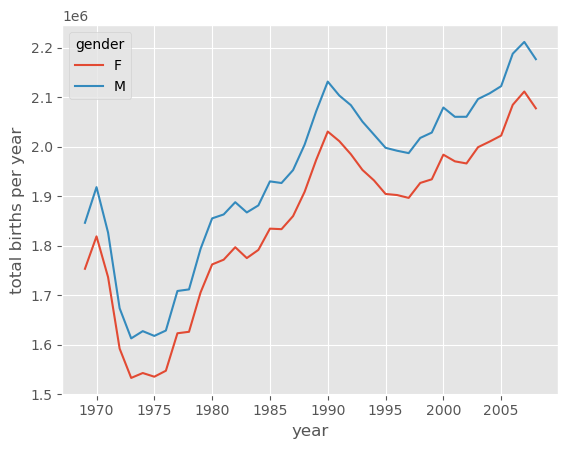

In [642]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [644]:
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [662]:
births_filtered = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [666]:
# Manejar valores nulos
births['day'].fillna(0, inplace=True)  # O eliminar filas: births = births[births['day'].notnull()]

# Convertir la columna 'day' a entero
births['day'] = births['day'].astype(int)

# Verificar el resultado
print(births)

       year  month  day gender  births  decade
0      1969      1    1      F    4046    1960
1      1969      1    1      M    4440    1960
2      1969      1    2      F    4454    1960
3      1969      1    2      M    4548    1960
4      1969      1    3      F    4548    1960
...     ...    ...  ...    ...     ...     ...
15542  2008     10    0      M  183219    2000
15543  2008     11    0      F  158939    2000
15544  2008     11    0      M  165468    2000
15545  2008     12    0      F  173215    2000
15546  2008     12    0      M  181235    2000

[15547 rows x 6 columns]


### CHAPTER 22: Vectorized String Operations

#### Introducing Pandas String Operations

In [683]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [685]:
data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [687]:
data = ['peter', 'Paul', None, 'MARY', 'gUIDO']
[s if s is None else s.capitalize() for s in data]

['Peter', 'Paul', None, 'Mary', 'Guido']

In [689]:
names = pd.Series(data)
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

#### Tables of Pandas String Methods

In [692]:
monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])

#### Methods Similar to Python String Methods

In [696]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [698]:
 monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [700]:
monte.str.startswith('T')

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [702]:
# Still others return lists or other compound values for each element:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object

#### Methods Using Regular Expressions

In [705]:
monte.str.extract('([A-Za-z]+)', expand=False)

0     Graham
1       John
2      Terry
3       Eric
4      Terry
5    Michael
dtype: object

In [707]:
# Or we can do something more complicated, like finding all names that start and end
# with a consonant, making use of the start-of-string (^) and end-of-string ($) regular
# expression characters:
monte.str.findall(r'^[^AEIOU].*[^aeiou]$')

0    [Graham Chapman]
1                  []
2     [Terry Gilliam]
3                  []
4       [Terry Jones]
5     [Michael Palin]
dtype: object

#### Vectorized item access and slicing

In [710]:
monte.str[0:3]

0    Gra
1    Joh
2    Ter
3    Eri
4    Ter
5    Mic
dtype: object

In [712]:
monte.str.split().str[-1]

0    Chapman
1     Cleese
2    Gilliam
3       Idle
4      Jones
5      Palin
dtype: object

####  Indicator variables

In [717]:
full_monte = pd.DataFrame({'name': monte,
                           'info': ['B|C|D', 'B|D', 'A|C',
                                    'B|D', 'B|C', 'B|C|D']})
full_monte

,name,info
0,Graham Chapman,B|C|D
1,John Cleese,B|D
2,Terry Gilliam,A|C
3,Eric Idle,B|D
4,Terry Jones,B|C
5,Michael Palin,B|C|D


In [719]:
full_monte['info'].str.get_dummies('|')

,A,B,C,D
0,0,1,1,1
1,0,1,0,1
2,1,0,1,0
3,0,1,0,1
4,0,1,1,0
5,0,1,1,1


##### Example: Recipe Database

In [729]:
import os

os.makedirs('data', exist_ok=True)

In [731]:
import requests
import gzip
import shutil

# URL del archivo
repo = "https://raw.githubusercontent.com/jakevdp/open-recipe-data/master"
url = f"{repo}/recipeitems.json.gz"

# Descargar el archivo
response = requests.get(url)
with open('data/recipeitems.json.gz', 'wb') as f:
    f.write(response.content)

In [733]:
# Descomprimir el archivo
with gzip.open('data/recipeitems.json.gz', 'rb') as f_in:
    with open('data/recipeitems.json', 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [735]:
recipes = pd.read_json('data/recipeitems.json', lines=True)
recipes.shape

(173278, 17)

In [737]:
recipes.iloc[0]

_id                                {'$oid': '5160756b96cc62079cc2db15'}
name                                    Drop Biscuits and Sausage Gravy
ingredients           Biscuits\n3 cups All-purpose Flour\n2 Tablespo...
url                   http://thepioneerwoman.com/cooking/2013/03/dro...
image                 http://static.thepioneerwoman.com/cooking/file...
ts                                             {'$date': 1365276011104}
cookTime                                                          PT30M
source                                                  thepioneerwoman
recipeYield                                                          12
datePublished                                                2013-03-11
prepTime                                                          PT10M
description           Late Saturday afternoon, after Marlboro Man ha...
totalTime                                                           NaN
creator                                                         

In [739]:
recipes.ingredients.str.len().describe()

count    173278.000000
mean        244.617926
std         146.705285
min           0.000000
25%         147.000000
50%         221.000000
75%         314.000000
max        9067.000000
Name: ingredients, dtype: float64

In [741]:
recipes.name[np.argmax(recipes.ingredients.str.len())]

'Carrot Pineapple Spice &amp; Brownie Layer Cake with Whipped Cream &amp; Cream Cheese Frosting and Marzipan Carrots'

In [743]:
recipes.description.str.contains('[Bb]reakfast').sum()

3524

In [745]:
recipes.ingredients.str.contains('[Cc]innamon').sum()

10526

In [747]:
recipes.ingredients.str.contains('[Cc]inamon').sum()

11

#### A Simple Recipe Recommender

In [750]:
spice_list = ['salt', 'pepper', 'oregano', 'sage', 'parsley',
              'rosemary', 'tarragon', 'thyme', 'paprika', 'cumin']

In [752]:
import re
spice_df = pd.DataFrame({
    spice: recipes.ingredients.str.contains(spice, re.IGNORECASE)
    for spice in spice_list})
spice_df.head()

,salt,pepper,oregano,sage,parsley,rosemary,tarragon,thyme,paprika,cumin
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,True,True,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [754]:
selection = spice_df.query('parsley & paprika & tarragon')
len(selection)

10

In [756]:
recipes.name[selection.index]

2069      All cremat with a Little Gem, dandelion and wa...
74964                         Lobster with Thermidor butter
93768      Burton's Southern Fried Chicken with White Gravy
113926                     Mijo's Slow Cooker Shredded Beef
137686                     Asparagus Soup with Poached Eggs
140530                                 Fried Oyster Po’boys
158475                Lamb shank tagine with herb tabbouleh
158486                 Southern fried chicken in buttermilk
163175            Fried Chicken Sliders with Pickles + Slaw
165243                        Bar Tartine Cauliflower Salad
Name: name, dtype: object

### CHAPTER 23: Working with Time Series

##### Dates and Times in Python
##### Native Python Dates and Times: datetime and dateutil

In [764]:
from datetime import datetime
datetime(year=2021, month=7, day=4)

datetime.datetime(2021, 7, 4, 0, 0)

In [766]:
# Or, using the dateutil module, you can parse dates from a variety of string formats:
from dateutil import parser
date = parser.parse("4th of July, 2021")
date

datetime.datetime(2021, 7, 4, 0, 0)

In [769]:
date.strftime('%A')

'Sunday'

##### Typed Arrays of Times: NumPy’s datetime64

In [772]:
import numpy as np
date = np.array('2021-07-04', dtype=np.datetime64)
date

array('2021-07-04', dtype='datetime64[D]')

In [774]:
date + np.arange(12)

array(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
       '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
       '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
      dtype='datetime64[D]')

In [776]:
np.datetime64('2021-07-04')

numpy.datetime64('2021-07-04')

In [778]:
# Here is a minute-based datetime:
np.datetime64('2021-07-04 12:00')

numpy.datetime64('2021-07-04T12:00')

In [780]:
# You can force any desired fundamental unit using one of many format codes; for
# example, here we’ll force a nanosecond-based time:
np.datetime64('2021-07-04 12:59:59.50', 'ns')

numpy.datetime64('2021-07-04T12:59:59.500000000')

#### Dates and Times in Pandas: The Best of Both Worlds

In [783]:
import pandas as pd
date = pd.to_datetime("4th of July, 2021")
date

Timestamp('2021-07-04 00:00:00')

In [785]:
date.strftime('%A')

'Sunday'

In [787]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2021-07-04', '2021-07-05', '2021-07-06', '2021-07-07',
               '2021-07-08', '2021-07-09', '2021-07-10', '2021-07-11',
               '2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15'],
              dtype='datetime64[ns]', freq=None)

##### Pandas Time Series: Indexing by Time

In [790]:
index = pd.DatetimeIndex(['2020-07-04', '2020-08-04',
                          '2021-07-04', '2021-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2020-07-04    0
2020-08-04    1
2021-07-04    2
2021-08-04    3
dtype: int64

In [792]:
# And now that we have this data in a Series, we can make use of any of the Series
# indexing patterns we discussed in previous chapters, passing values that can be
# coerced into dates:
data['2020-07-04':'2021-07-04']

2020-07-04    0
2020-08-04    1
2021-07-04    2
dtype: int64

In [794]:
#There are additional special date-only indexing operations, such as passing a year to
# obtain a slice of all data from that year:
data['2021']

2021-07-04    2
2021-08-04    3
dtype: int64

#### Pandas Time Series Data Structures

In [797]:
dates = pd.to_datetime([datetime(2021, 7, 3), '4th of July, 2021',
                        '2021-Jul-6', '07-07-2021', '20210708'])
dates

DatetimeIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
               '2021-07-08'],
              dtype='datetime64[ns]', freq=None)

In [799]:
dates.to_period('D')

PeriodIndex(['2021-07-03', '2021-07-04', '2021-07-06', '2021-07-07',
             '2021-07-08'],
            dtype='period[D]')

In [801]:
# TimedeltaIndex is created, for example, when a date is subtracted from another:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

### Regular Sequences: pd.date_range

In [805]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [809]:
# Alternatively, the date range can be specified not with a start and end point, but with
# a start point and a number of periods:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [811]:
# The spacing can be modified by altering the freq argument, which defaults to D. For
# example, here we construct a range of hourly timestamps:
pd.date_range('2015-07-03', periods=8, freq='H')

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\3474579020.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range('2015-07-03', periods=8, freq='H')


DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='h')

In [813]:
# To create regular sequences of Period or Timedelta values, the similar
# pd.period_range and pd.timedelta_range functions are useful. Here are some
# monthly periods:
pd.period_range('2015-07', periods=8, freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]')

In [815]:
# pd.period_range('2015-07', periods=8, freq='M')
pd.timedelta_range(0, periods=6, freq='H')

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\2516610642.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=6, freq='H')


TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00'],
               dtype='timedelta64[ns]', freq='h')

#### Frequencies and Offsets

In [818]:
pd.timedelta_range(0, periods=6, freq="2H30T")

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\22847273.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.timedelta_range(0, periods=6, freq="2H30T")
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\22847273.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  pd.timedelta_range(0, periods=6, freq="2H30T")


TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00'],
               dtype='timedelta64[ns]', freq='150min')

In [820]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01', periods=6, freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08'],
              dtype='datetime64[ns]', freq='B')

#### Resampling, Shifting, and Windowing

In [827]:
pip install pandas_datareader

   ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/109.5 kB 435.7 kB/s eta 0:00:01
   -------------- ------------------------ 41.0/109.5 kB 388.9 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/109.5 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- 109.5/109.5 kB 632.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [829]:
import pandas_datareader as data

In [833]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 487.6 kB/s eta 0:00:06
     - -------------------------------------- 0.1/3.0 MB 1.2 MB/s eta 0:00:03
     -------- ------------------------------- 0.6/3.0 MB 3.9 MB/s eta 0:00:01
     ---------------------- ----------------- 1.6/3.0 MB 8.1 MB/s eta 0:00:01
     ------------------------ --------------- 1.8/3.0 MB 8.8 MB/s eta 0:00:01
     ---------------------------------------  2.9/3.0 MB 9.9 MB/s eta 0:00:01
     ---------------------------------------- 3.0/3.0 MB 9.0 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished

In [835]:
import yfinance as yf

# Descargar datos del S&P 500
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31')
print(sp500.head())

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059  2695.810059   
2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059  2713.060059   
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990  2723.989990   
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902  2743.149902   
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961  2747.709961   

                Volume  
Date                    
2018-01-02  3397430000  
2018-01-03  3544030000  
2018-01-04  3697340000  
2018-01-05  3239280000  
2018-01-08  3246160000  


In [845]:
# Descargar datos del S&P 500
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31')

# Verifica el contenido
print(sp500.head())
print(sp500.columns)

# Acceder a la columna 'Close' si existe
if 'Close' in sp500.columns:
    close_prices = sp500['Close']
    print(close_prices.head())
else:
    print("La columna 'Close' no está disponible.")

[*********************100%***********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-01-02  2683.729980  2695.889893  2682.360107  2695.810059  2695.810059   
2018-01-03  2697.850098  2714.370117  2697.770020  2713.060059  2713.060059   
2018-01-04  2719.310059  2729.290039  2719.070068  2723.989990  2723.989990   
2018-01-05  2731.330078  2743.449951  2727.919922  2743.149902  2743.149902   
2018-01-08  2742.669922  2748.510010  2737.600098  2747.709961  2747.709961   

                Volume  
Date                    
2018-01-02  3397430000  
2018-01-03  3544030000  
2018-01-04  3697340000  
2018-01-05  3239280000  
2018-01-08  3246160000  
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Date
2018-01-02    2695.810059
2018-01-03    2713.060059
2018-01-04    2723.989990
2018-01-05    2743.149902
2018-01-08    2747.709961
Name: Close, dtype: float64


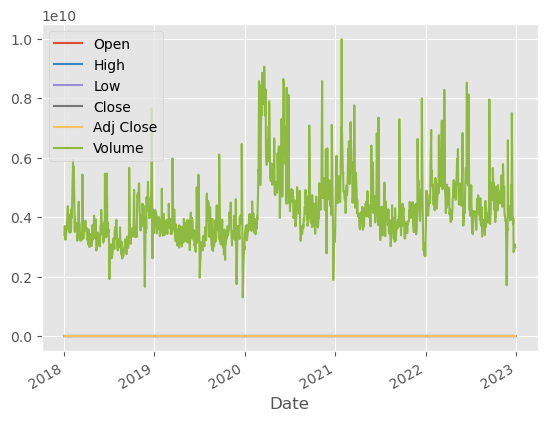

In [851]:
 %matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
sp500.plot();

#### Resampling and Converting Frequencies

C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\3342605191.py:2: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  sp500.resample('BA').mean().plot(style=':')
C:\Users\Cielo Aholiva\AppData\Local\Temp\ipykernel_13140\3342605191.py:3: FutureWarning: 'BA' is deprecated and will be removed in a future version, please use 'BYE' instead.
  sp500.asfreq('BA').plot(style='--');


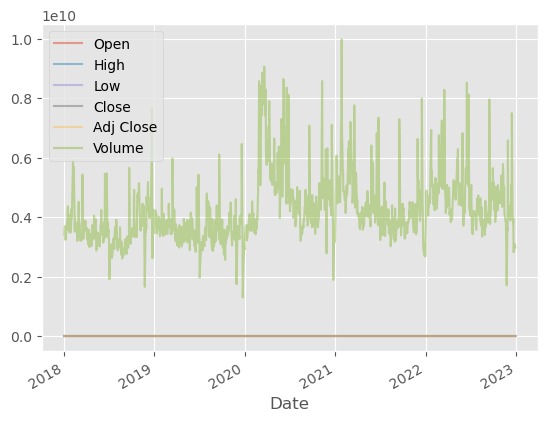

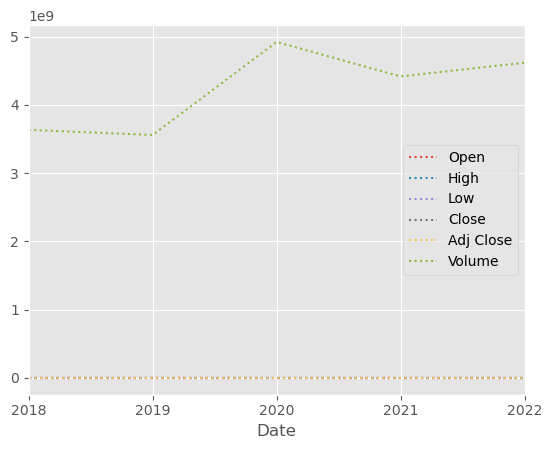

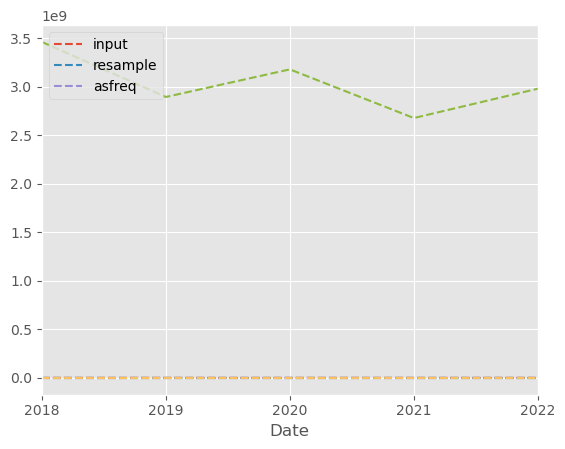

In [854]:
sp500.plot(alpha=0.5, style='-')
sp500.resample('BA').mean().plot(style=':')
sp500.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'],
           loc='upper left');

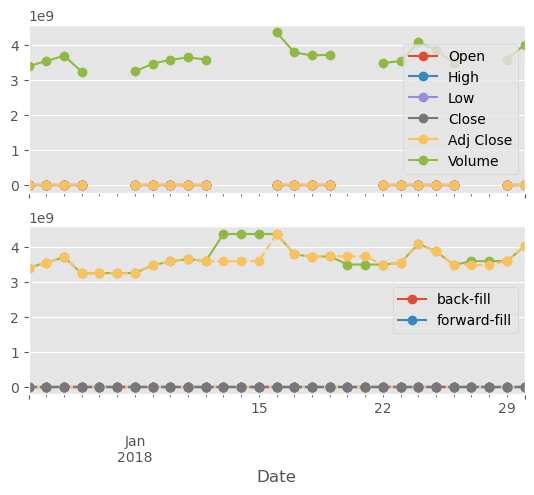

In [856]:
fig, ax = plt.subplots(2, sharex=True)
data = sp500.iloc[:20]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

#### Time Shifts

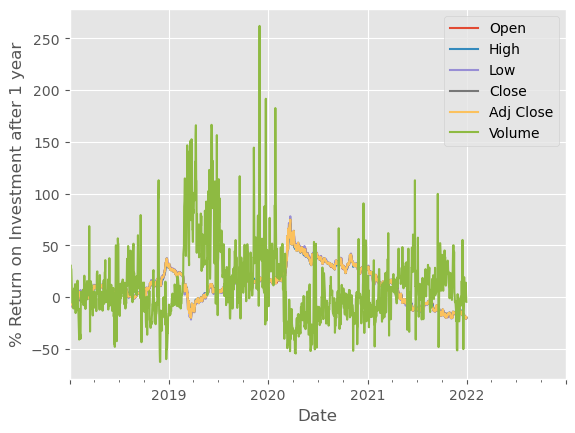

In [859]:
sp500 = sp500.asfreq('D', method='pad')

ROI = 100 * (sp500.shift(-365) - sp500) / sp500
ROI.plot()
plt.ylabel('% Return on Investment after 1 year');

#### Chapter 24 : High-Performance Pandas: eval and query

In [870]:
rng = np.random.default_rng(42)
x = rng.random(1000000)
y = rng.random(1000000)
%timeit x + y

2.54 ms ± 159 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [874]:
mask = (x > 0.5) & (y < 0.5)

In [876]:
tmp1 = (x > 0.5)
tmp2 = (y < 0.5)
mask = tmp1 & tmp2

In [880]:
import numexpr
mask_numexpr = numexpr.evaluate('(x > 0.5) & (y < 0.5)')
np.all(mask == mask_numexpr)

True

#### pandas.eval for Efficient Operations

In [883]:
nrows, ncols = 100000, 100
df1, df2, df3, df4 = (pd.DataFrame(rng.random((nrows, ncols)))
                      for i in range(4))

In [885]:
# To compute the sum of all four DataFrames using the typical Pandas approach, we can
# just write the sum:
%timeit df1 + df2 + df3 + df4

67.4 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [887]:
%timeit pd.eval('df1 + df2 + df3 + df4')

31.7 ms ± 4.52 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [889]:
np.allclose(df1 + df2 + df3 + df4,
            pd.eval('df1 + df2 + df3 + df4'))

True

In [891]:
df1, df2, df3, df4, df5 = (pd.DataFrame(rng.integers(0, 1000, (100, 3)))
                           for i in range(5))

In [893]:
# Here’s a summary of the operations pd.eval supports:
# Arithmetic operators
# pd.eval supports all arithmetic operators. For example:
result1 = -df1 * df2 / (df3 + df4) - df5
result2 = pd.eval('-df1 * df2 / (df3 + df4) - df5')
np.allclose(result1, result2)

True

In [895]:
# Comparison operators
# pd.eval supports all comparison operators, including chained expressions:
result1 = (df1 < df2) & (df2 <= df3) & (df3 != df4)
result2 = pd.eval('df1 < df2 <= df3 != df4')
np.allclose(result1, result2)

True

In [897]:
# Bitwise operators
# pd.eval supports the & and | bitwise operators:
result1 = (df1 < 0.5) & (df2 < 0.5) | (df3 < df4)
result2 = pd.eval('(df1 < 0.5) & (df2 < 0.5) | (df3 < df4)')
np.allclose(result1, result2)

True

In [899]:
# In addition, it supports the use of the literal and and or in Boolean expressions:
result3 = pd.eval('(df1 < 0.5) and (df2 < 0.5) or (df3 < df4)')
np.allclose(result1, result3)

True

In [ ]:
# Object attributes and indices
# pd.eval supports access to object attributes via the obj.attr syntax and indexes
# via the obj[index] syntax:

In [901]:
result1 = df2.T[0] + df3.iloc[1]
result2 = pd.eval('df2.T[0] + df3.iloc[1]')
np.allclose(result1, result2)

True

#### DataFrame.eval for Column-Wise Operations

In [904]:
df = pd.DataFrame(rng.random((1000, 3)), columns=['A', 'B', 'C'])
df.head()

,A,B,C
0,0.850888,0.966709,0.958690
1,0.820126,0.385686,0.061402
2,0.059729,0.831768,0.652259
3,0.244774,0.140322,0.041711
4,0.818205,0.753384,0.578851


In [906]:
# Using pd.eval as in the previous section, we can compute expressions with the three
# columns like this:
result1 = (df['A'] + df['B']) / (df['C'] - 1)
result2 = pd.eval("(df.A + df.B) / (df.C - 1)")
np.allclose(result1, result2)

True

In [908]:
# The DataFrame.eval method allows much more succinct evaluation of expressions
# with the columns:
result3 = df.eval('(A + B) / (C - 1)')
np.allclose(result1, result3)

True

#### Assignment in DataFrame.eval

In [911]:
df.head()

,A,B,C
0,0.850888,0.966709,0.958690
1,0.820126,0.385686,0.061402
2,0.059729,0.831768,0.652259
3,0.244774,0.140322,0.041711
4,0.818205,0.753384,0.578851


In [913]:
# We can use df.eval to create a new column 'D' and assign to it a value computed
# from the other columns:
df.eval('D = (A + B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.850888,0.966709,0.958690,1.895916
1,0.820126,0.385686,0.061402,19.638139
2,0.059729,0.831768,0.652259,1.366782
3,0.244774,0.140322,0.041711,9.232370
4,0.818205,0.753384,0.578851,2.715013


In [915]:
# In the same way, any existing column can be modified:
df.eval('D = (A - B) / C', inplace=True)
df.head()

,A,B,C,D
0,0.850888,0.966709,0.958690,-0.120812
1,0.820126,0.385686,0.061402,7.075399
2,0.059729,0.831768,0.652259,-1.183638
3,0.244774,0.140322,0.041711,2.504142
4,0.818205,0.753384,0.578851,0.111982


#### Local Variables in DataFrame.eval

In [918]:
column_mean = df.mean(1)
result1 = df['A'] + column_mean
result2 = df.eval('A + @column_mean')
np.allclose(result1, result2)

True

#### The DataFrame.query Method

In [921]:
result1 = df[(df.A < 0.5) & (df.B < 0.5)]
result2 = pd.eval('df[(df.A < 0.5) & (df.B < 0.5)]')
np.allclose(result1, result2)

True

In [923]:
result2 = df.query('A < 0.5 and B < 0.5')
np.allclose(result1, result2)

True

In [925]:
#In addition to being a more efficient computation, compared to the masking expres‐
# sion this is much easier to read and understand. Note that the query method also
# accepts the @ flag to mark local variables:
Cmean = df['C'].mean()
result1 = df[(df.A < Cmean) & (df.B < Cmean)]
result2 = df.query('A < @Cmean and B < @Cmean')
np.allclose(result1, result2)

True

#### Performance: When to Use These Functions

In [928]:
 x = df[(df.A < 0.5) & (df.B < 0.5)]

In [930]:
tmp1 = df.A < 0.5
tmp2 = df.B < 0.5
tmp3 = tmp1 & tmp2
x = df[tmp3]

In [932]:
 df.values.nbytes

32000